In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/spam.csv', encoding="ISO-8859-1")

In [3]:
## Data Cleaning
## EDA
## text preprocessing
## model training
## evaluation
## Improvements

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
## Drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
# rename columns
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

## EDA (Exploratory Data Analysis)

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

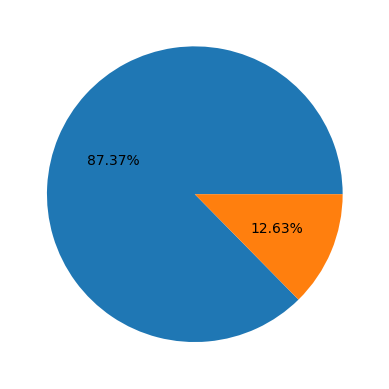

In [17]:
plt.pie(df['target'].value_counts(), autopct='%.2f%%')
plt.show()

In [18]:
## Data is Imbalanced!

In [19]:
import nltk

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df['no_of_chars'] = df['text'].apply(len)

In [22]:
df

,target,text,no_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
## Number of words used in SMS:

df['no_of_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,no_of_chars,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# Number of Sentances : 
df['no_of_sentances'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [26]:
df.describe()

,target,no_of_chars,no_of_words,no_of_sentances
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
df[df['target'] == 0].describe()

,target,no_of_chars,no_of_words,no_of_sentances
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [28]:
df[df['target'] == 1].describe()

,target,no_of_chars,no_of_words,no_of_sentances
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='no_of_chars', ylabel='Count'>

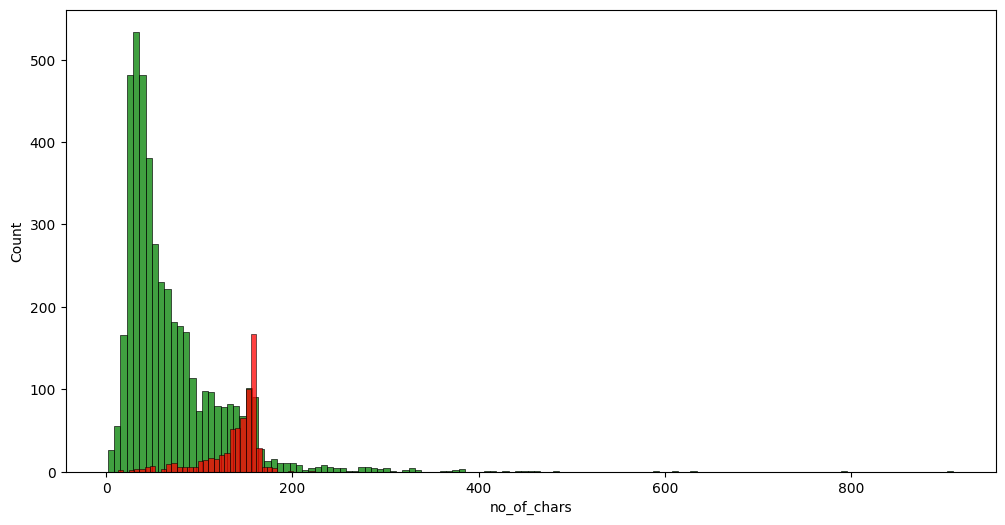

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot((df[df['target'] == 0]['no_of_chars']), color='g')
sns.histplot((df[df['target'] == 1]['no_of_chars']), color='r')

<Axes: xlabel='no_of_words', ylabel='Count'>

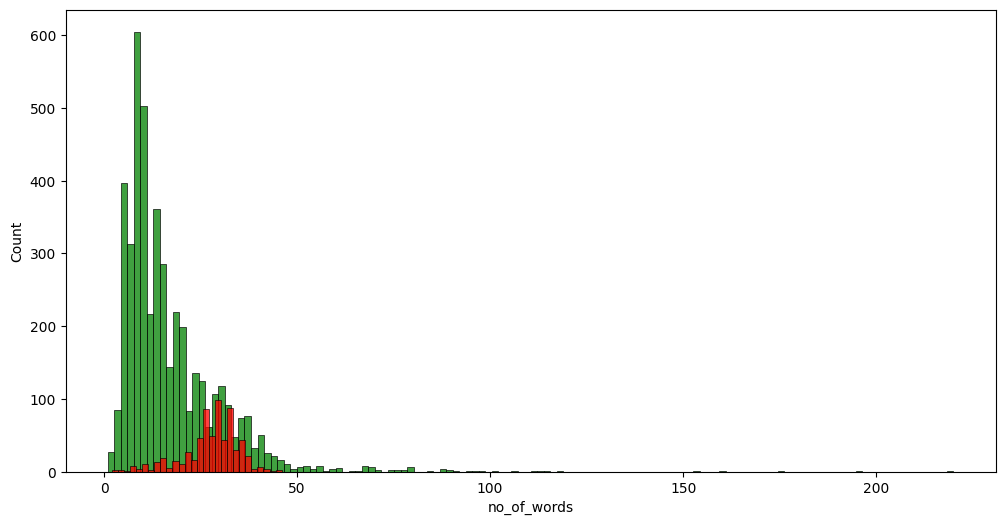

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot((df[df['target'] == 0]['no_of_words']), color='g')
sns.histplot((df[df['target'] == 1]['no_of_words']), color='r')

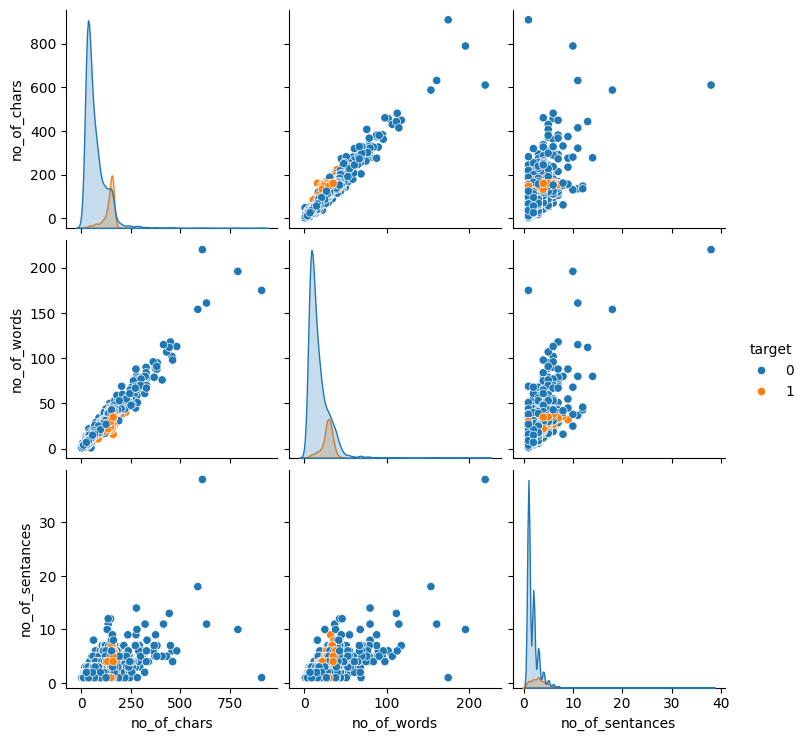

In [31]:
sns.pairplot(df, hue='target')

<Axes: >

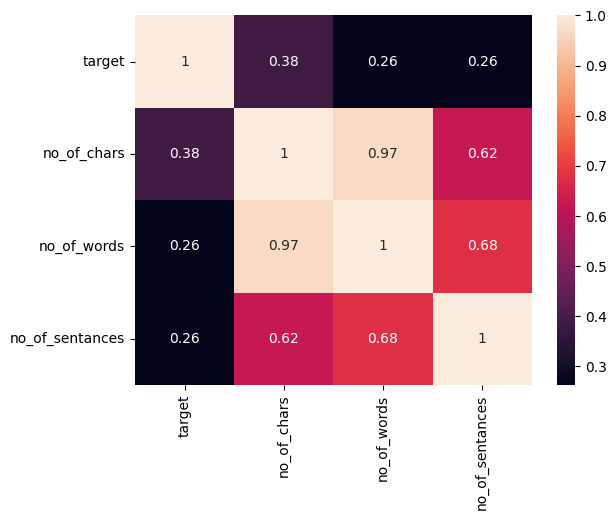

In [32]:
sns.heatmap(df[['target', 'no_of_chars', 'no_of_words', 'no_of_sentances']] .corr(), annot=True)

## Data / Text preprocessing

#### Lower Case
#### Tokenization
#### remove special characters
#### removing stop words and punctuations
#### stemming

In [44]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import string
def transformText(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()
    y = []
    for i in text:
        if i.isalnum():
             y.append(i)

    text = y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [47]:
transformText('Hi, I love playing cricket a lot! Do you like it?')

'hi love play cricket lot like'

In [35]:
# stopwords.words('english')

In [36]:
# string.punctuation

In [43]:
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [49]:
df['transformed_column'] = df['text'].apply(transformText)

In [50]:
df

,target,text,no_of_chars,no_of_words,no_of_sentances,transformed_column
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [52]:
from wordcloud import WordCloud

In [60]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

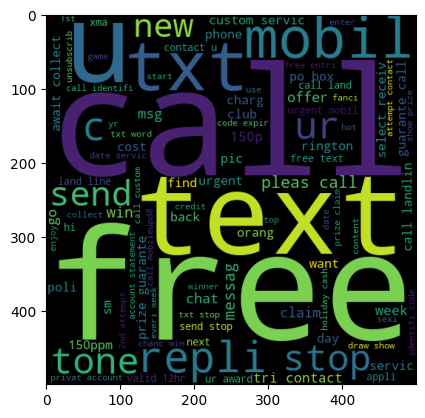

In [71]:
spam_wordcloud = wc.generate(df[df['target'] == 1]['transformed_column'].str.cat(sep=' '))
plt.imshow(spam_wordcloud)

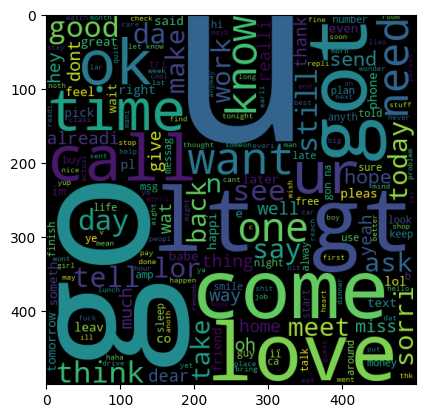

In [72]:
ham_wordcloud = wc.generate(df[df['target'] == 0]['transformed_column'].str.cat(sep=' '))
plt.imshow(spam_wordcloud)